In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df=pd.read_csv('C:\\Users\\ASUS\\Desktop\\Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.isna().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [9]:
df.duplicated().sum()

1889

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [11]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
df.shape

(4653, 9)

In [16]:
df.Education.value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

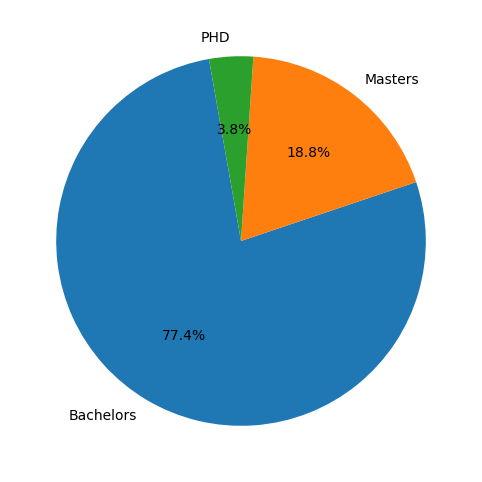

In [18]:
edu_count=df.Education.value_counts()
plt.figure(figsize=(10,6))
plt.pie(edu_count,labels=edu_count.index,autopct='%1.1f%%',startangle=100)
plt.show()

In [24]:
df.JoiningYear.value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

<Axes: xlabel='JoiningYear', ylabel='count'>

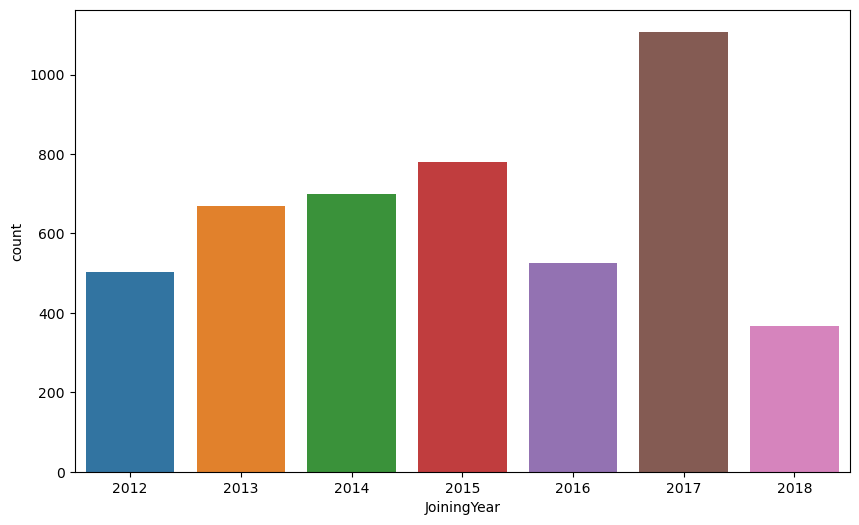

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='JoiningYear',data=df)


In [32]:
pd.crosstab(df.JoiningYear,df.City,values=df.Age,aggfunc='median')

City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,28.0,28.0,27.0
2013,27.5,27.0,27.5
2014,28.0,28.0,28.0
2015,28.0,28.0,28.0
2016,28.0,28.0,28.0
2017,28.0,28.0,28.0
2018,28.0,28.0,28.0


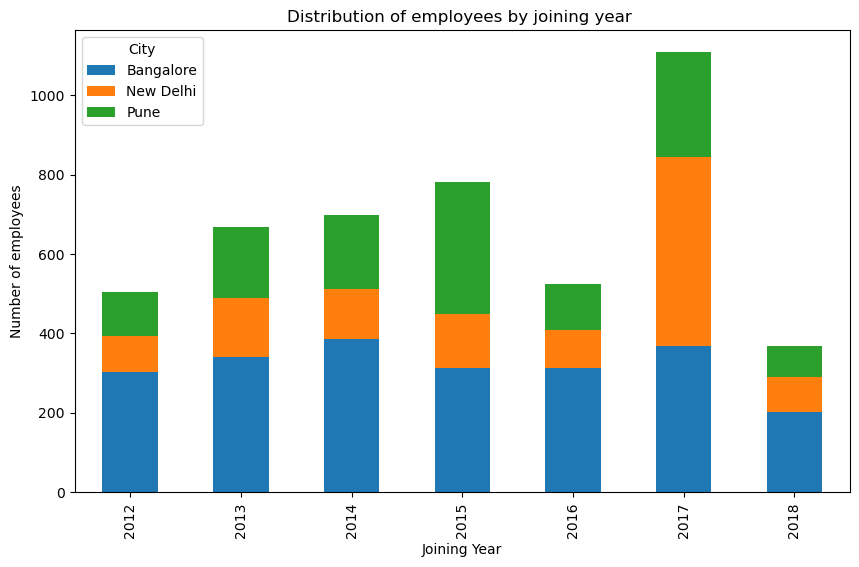

In [33]:
city_joinyear=df.groupby(['JoiningYear','City']).size().unstack()
ax=city_joinyear.plot(kind='bar',stacked=True,figsize=(10,6))

plt.xlabel('Joining Year')
plt.ylabel('Number of employees')
plt.title('Distribution of employees by joining year ')
plt.legend(title='City',loc='upper left')
plt.show()

In [34]:
pd.crosstab(df.Gender,df.Education)

Education,Bachelors,Masters,PHD
Gender,,,
Female,1435,371,69
Male,2166,502,110


<Axes: xlabel='Education', ylabel='count'>

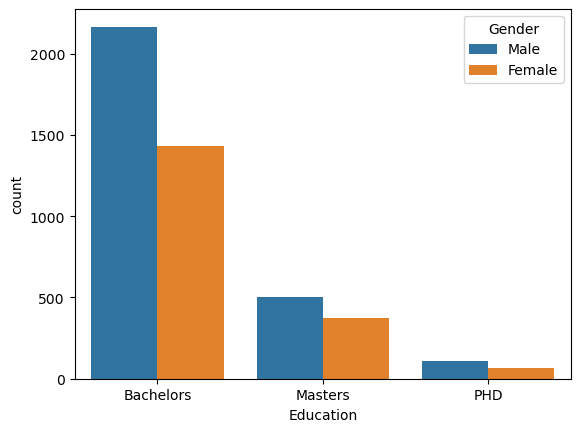

In [36]:
sns.countplot(data=df,x=df.Education,hue='Gender')

In [37]:
pd.crosstab(df.PaymentTier,df.Gender)

Gender,Female,Male
PaymentTier,,
1,131,112
2,605,313
3,1139,2353


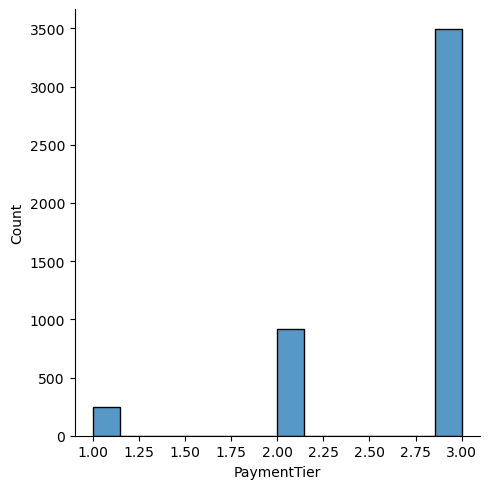

In [38]:
sns.displot(df['PaymentTier'])

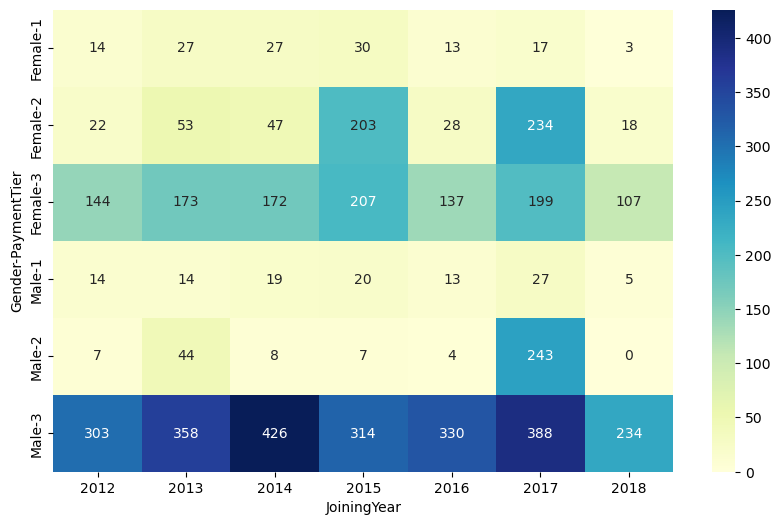

In [39]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10,6))
sns.heatmap(x,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [40]:
df.EverBenched.value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [41]:
pd.crosstab(df.Gender,df.EverBenched)

EverBenched,No,Yes
Gender,,
Female,1696,179
Male,2479,299


<Axes: xlabel='EverBenched', ylabel='count'>

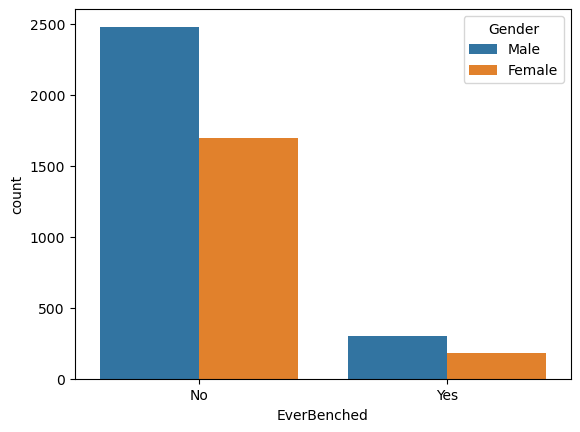

In [42]:
sns.countplot(data=df,x='EverBenched',hue='Gender')

<Figure size 1000x600 with 0 Axes>

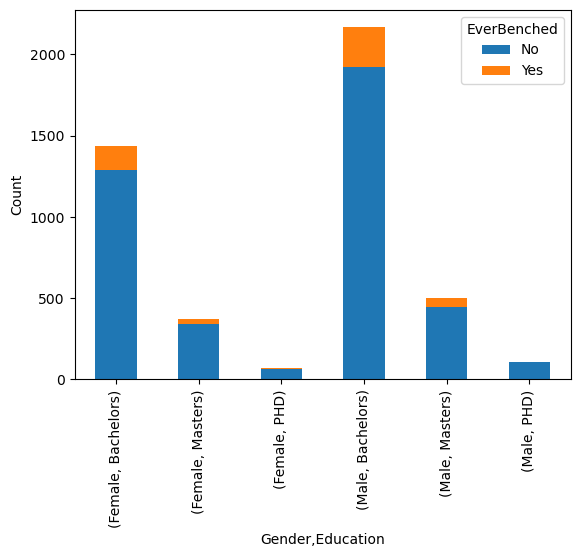

In [49]:
x=pd.crosstab([df['Gender'],df['Education']],df['EverBenched'])
plt.figure(figsize=(10,6))

x.plot(kind='bar',stacked=True)
plt.xlabel('Gender,Education')
plt.ylabel('Count')
plt.show()

In [50]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [53]:
pd.crosstab(df.ExperienceInCurrentDomain,df.Gender)

Gender,Female,Male
ExperienceInCurrentDomain,,
0,142,213
1,227,331
2,447,640
3,321,465
4,367,564
5,365,554
6,2,6
7,4,5


<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

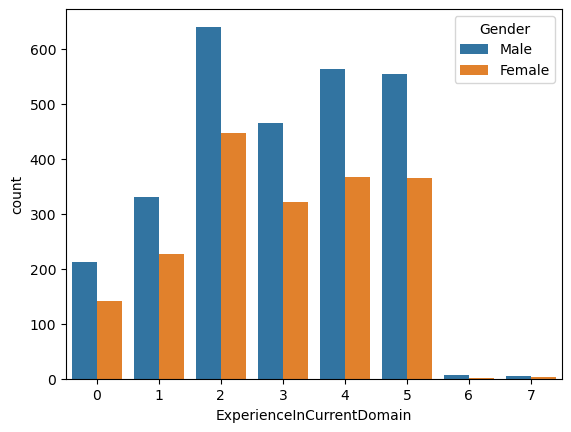

In [54]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='Gender')

In [55]:
pd.crosstab(df.ExperienceInCurrentDomain,df.PaymentTier)

PaymentTier,1,2,3
ExperienceInCurrentDomain,,,
0,25,66,264
1,36,90,432
2,51,252,784
3,41,150,595
4,43,184,704
5,45,174,700
6,1,1,6
7,1,1,7


In [56]:
df.ExperienceInCurrentDomain.value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

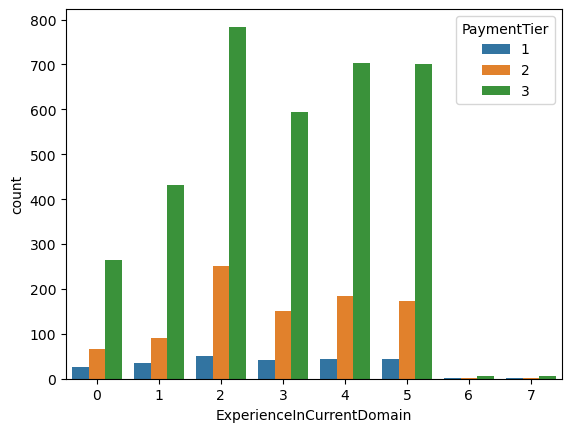

In [57]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='PaymentTier')

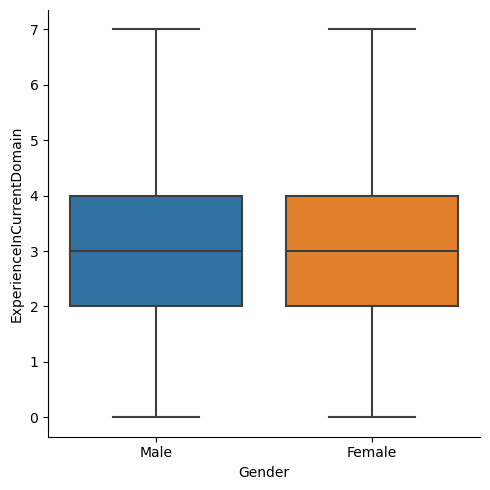

In [58]:
sns.catplot(data=df,x='Gender',y='ExperienceInCurrentDomain',kind='box')

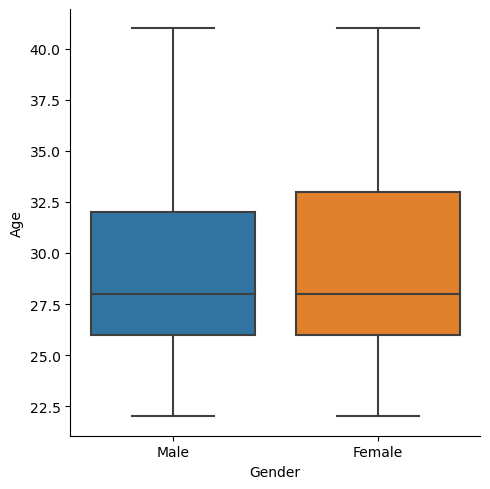

In [59]:
sns.catplot(data=df,x='Gender',y='Age',kind='box')

In [61]:
df.LeaveOrNot.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

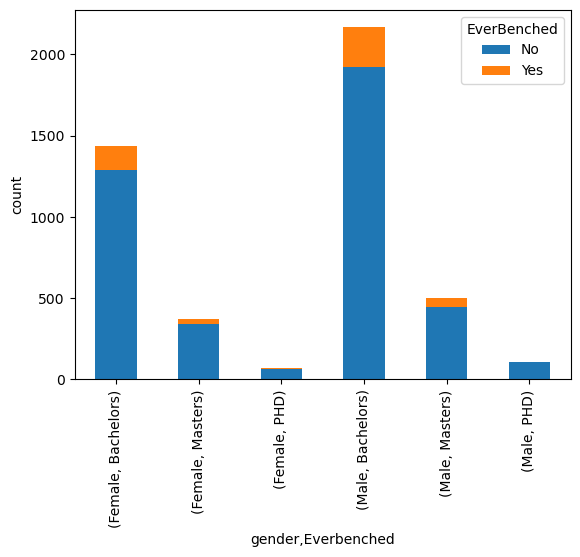

In [62]:
x.plot(kind='bar',stacked=True)
plt.xlabel('gender,Everbenched')
plt.ylabel('count')
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [80]:
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [81]:
x=df.drop(columns='LeaveOrNot')
y=df.LeaveOrNot
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.45)


In [82]:
model_svm=SVC(kernel='linear',random_state=0)
model_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [75]:
y_pred=model_svm.predict(X_test)

In [76]:
conf_matrix_svm=confusion_matrix(y_test,y_pred)
print(conf_matrix_svm)

[[1222  141]
 [ 463  268]]


In [77]:
accuracy_svm=accuracy_score(y_test,y_pred)
print(accuracy_svm)

0.711556829035339


In [78]:
classification_rep_svm=classification_report(y_test,y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1363
           1       0.66      0.37      0.47       731

    accuracy                           0.71      2094
   macro avg       0.69      0.63      0.64      2094
weighted avg       0.70      0.71      0.69      2094



In [90]:
dataset=pd.DataFrame(df)

In [91]:
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [94]:
x=dataset
y=df.Gender

In [95]:
y

0       1
1       0
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    1
4652    1
Name: Gender, Length: 4653, dtype: int64

In [96]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.40,random_state=42)

In [97]:
x_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4219,1,2017,1,2,34,0,0,4,0
3616,1,2015,1,3,38,1,0,1,0
679,0,2017,0,1,26,0,0,4,0
4074,0,2017,0,3,36,0,0,1,0
3927,1,2017,1,3,41,1,0,3,1
...,...,...,...,...,...,...,...,...,...
4426,0,2014,0,3,32,1,0,1,0
466,0,2013,0,3,26,1,1,4,0
3092,0,2016,0,3,39,0,0,1,0
3772,0,2015,0,3,41,1,0,1,0


In [98]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [100]:
X_train=scaler.fit_transform(x_train)

In [101]:
X_test=scaler.transform(x_test)

In [102]:
X_train

array([[ 1.39579612,  1.02155065,  0.25113228, ..., -0.32457131,
         0.70074446, -0.72581351],
       [ 1.39579612, -0.05111597,  0.25113228, ..., -0.32457131,
        -1.23503032, -0.72581351],
       [-0.51571859,  1.02155065, -0.94292258, ..., -0.32457131,
         0.70074446, -0.72581351],
       ...,
       [-0.51571859,  0.48521734, -0.94292258, ..., -0.32457131,
        -1.23503032, -0.72581351],
       [-0.51571859, -0.05111597, -0.94292258, ..., -0.32457131,
        -1.23503032, -0.72581351],
       [-0.51571859, -0.05111597, -0.94292258, ..., -0.32457131,
         1.34600272,  1.37776438]])

In [103]:
#cross validation
from sklearn.model_selection import cross_val_score

In [116]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [114]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [115]:
#should be least
np.mean(mse)

-2.8419018314821074e-31

In [118]:
#prediction
reg_pred=regression.predict(X_test)

In [119]:
reg_pred

array([ 3.33066907e-16, -3.33066907e-16,  0.00000000e+00, ...,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00])

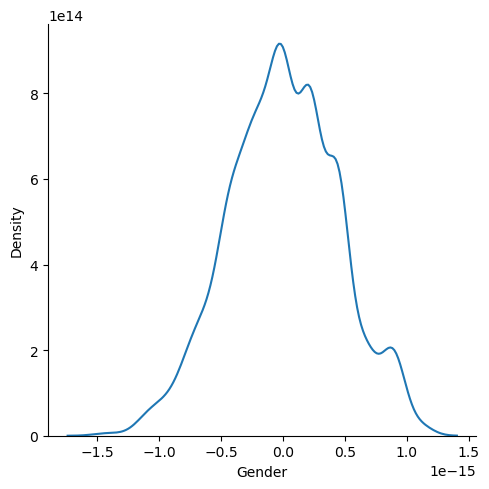

In [123]:
sns.displot(reg_pred-y_test,kind='kde')

In [124]:
from sklearn.metrics import r2_score 

In [125]:
score=r2_score(reg_pred,y_test)

In [126]:
score

1.0